In [5]:
import numpy as np
import matplotlib.pyplot as plt

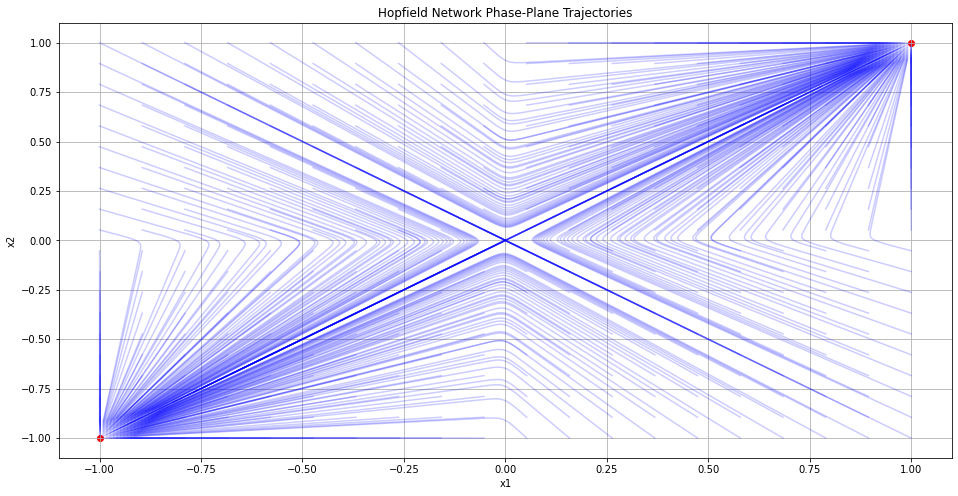

In [6]:
# Define the system parameters
W = np.array([[0, 1], [1, 0]])
b = np.array([0, 0])
T = 5  # Total simulation time
dt = 0.01  # Time step
n_steps = int(T / dt)

# Define the sigmoid function
def sigmoid(x):
    return (1 - np.exp(-100 * x)) / (1 + np.exp(-100 * x))

# Define the ODE function
def hopfield_network(x, t):
    dxdt = -0.5 * x + 0.5 * np.dot(W, sigmoid(x)) + 0.5 * b
    return dxdt

# Create a grid of initial conditions in the range [-1, 1] x [-1, 1]
x1_range = np.linspace(-1, 1, 20)
x2_range = np.linspace(-1, 1, 20)
initial_conditions = np.array(np.meshgrid(x1_range, x2_range)).T.reshape(-1, 2)

# Create a figure to plot the trajectories
plt.figure(figsize=(16, 8))
plt.xlabel('x1')
plt.ylabel('x2')

# Simulate and plot trajectories for each initial condition
for x0 in initial_conditions:
    trajectory = np.empty((n_steps, 2))
    x = x0
    for i in range(n_steps):
        trajectory[i] = x
        x += hopfield_network(x, 0) * dt
    plt.plot(trajectory[:, 0], trajectory[:, 1], 'b-', alpha=0.2)

# Plot the stable points (equilibrium)
stable_points = np.array([[-1, -1], [1, 1]])
plt.scatter(stable_points[:, 0], stable_points[:, 1], color='red', marker='o')

# Show the plot
plt.grid()
plt.title('Hopfield Network Phase-Plane Trajectories')
plt.savefig(f'./Images/PartB_Problem_3.pdf', bbox_inches="tight", dpi=300)
plt.show()
